출처https://ultrakid.tistory.com/13
## 크롤링(Crawling)이란?

웹 상에 존재하는 갖가지 컨텐츠를 수집하는 작업으로, 다양한 프로그램을 만들 수 있습니다.

예를 들어, 인터넷에 존재하는 이미지 파일을 하나하나 저장하기 번거롭습니다.

크롤링을 이용하면 간단한 코드로 짧은시간에 내가원하는 검색어의 이미지를 가져올 수 있습니다.

 

저는 딥러닝 학습을 위해 많은 양의 이미지가 필요했었는데 이때 자주 이용한 방법이 바로 크롤링입니다.

이것 말고도, 맛집 블로그 링크들을 한번에 모으던가 원하는 사이트목록을 빠른시간에 가져올 수 있는게 큰 장점입니다.
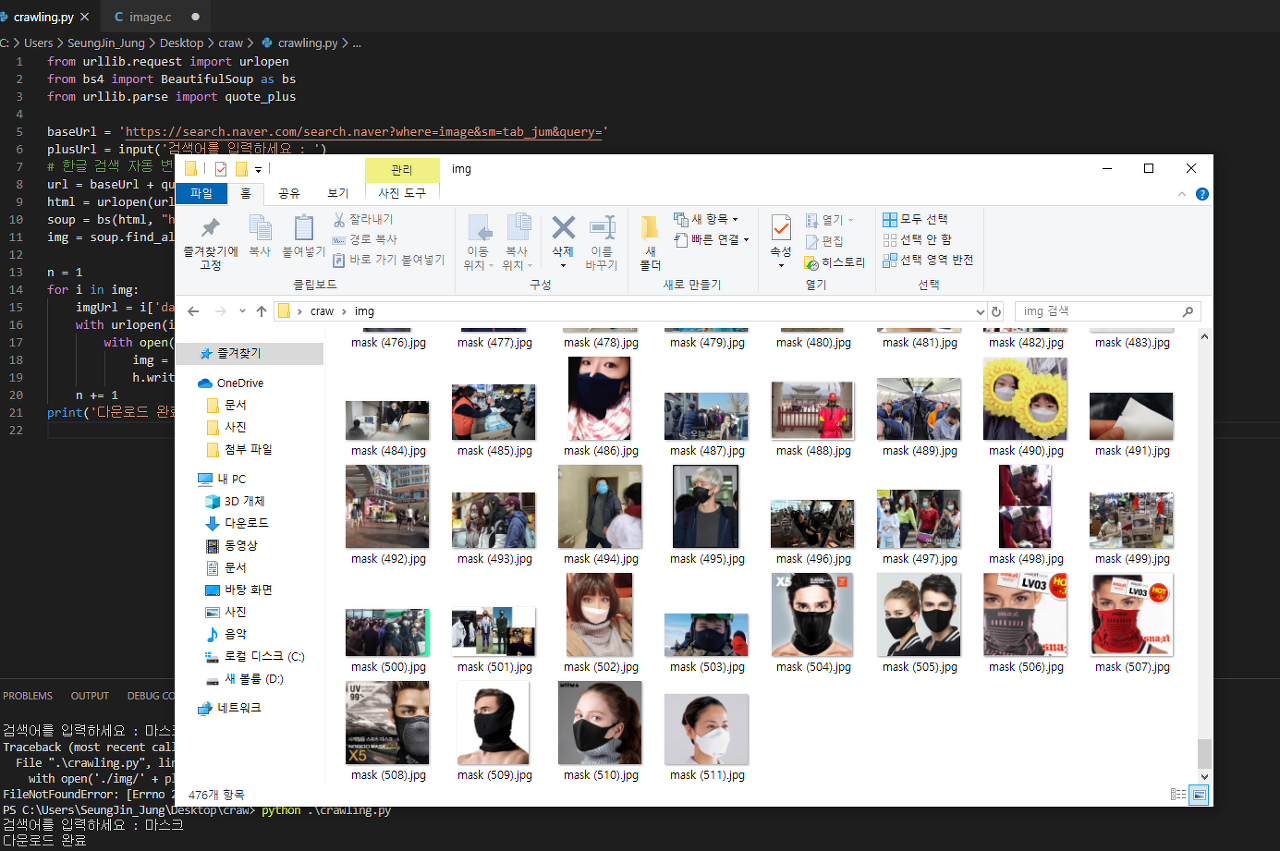

이렇게 실시간으로 사진이 폴더에 저장됩니다.

 

우선 크롤링에 필요한 import 목록입니다.

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from urllib.parse import quote_plus

urlopen은 파이썬을 설치할 때 기본적으로 설치되는 라이브러리입니다.

혹시모르니 필요한 라이브러리를 pip명령어를 이용하여 cmd창에서 설치해주도록 합시다.

 bequtifulsoup 라이브러리는 HTML 및 XML 파일에서 데이터를 가져 오는 Python 라이브러리입니다. 

이 라이브러리를 이용하여 조금더 편하게 정보를 가져올 수 있습니다.

 

우선 네이버 이미지를 긁어모으기 위해서 네이버 url을 들여다보면
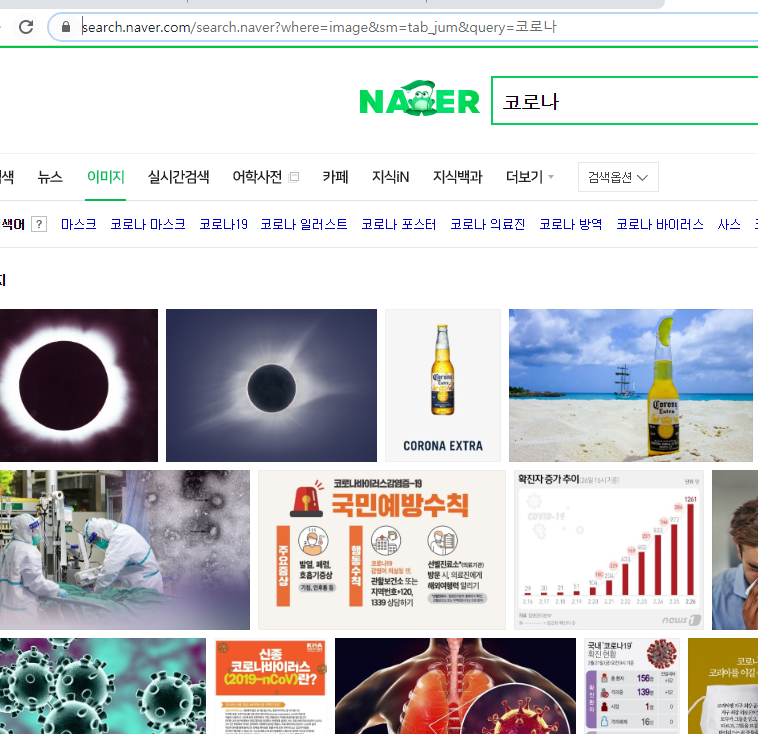

요즘 문제가 심각한 코로나에대해 검색해봤습니다. 또 다른 검색어로 검색해보겠습니다
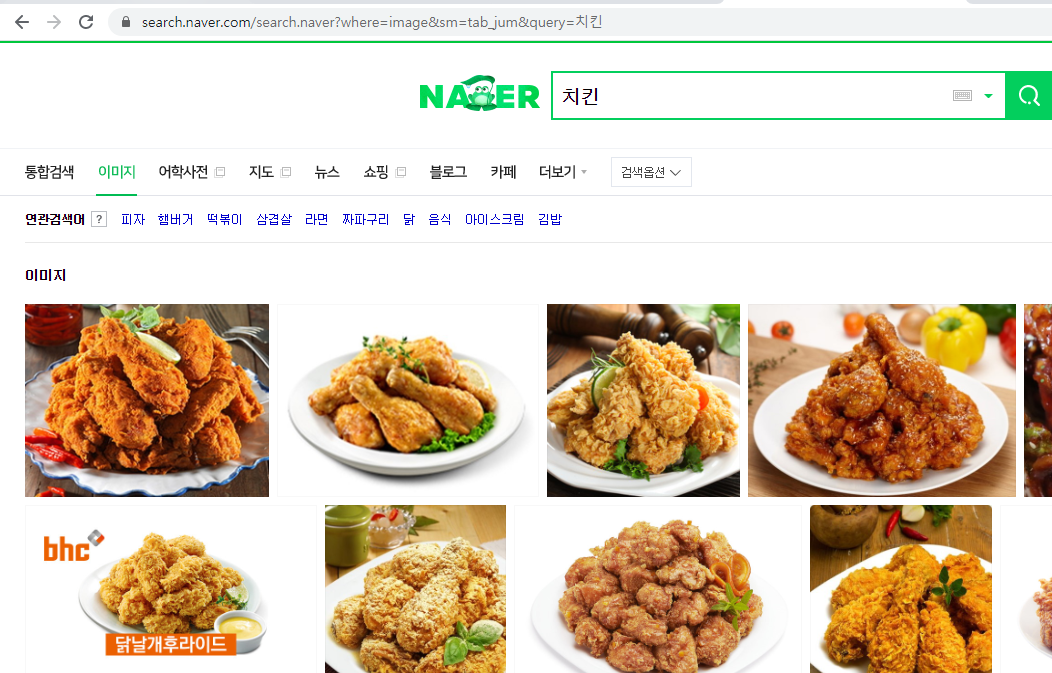
치킨이 먹고싶네요. 아무튼 위에 두 검색한 url을 들여다보면 

https://search.naver.com/search.naver?where=image&sm=tab_jum&query= 라는 주소에

치킨, 코로나 만 바뀐것을 알 수 있습니다.

 

baseurl 을 위의 주소로 두고, 우리가 원하는 검색어의 이미지를 크롤링하기 위하여 뒤에 검색어는

파이썬 실행시에 입력하도록 plusurl이라는 변수로 생성해줍니다.

 

In [2]:
baseUrl = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
plusUrl = input('검색어를 입력하세요 : ')
# url = baseurl + 검색어
url = baseUrl + quote_plus(plusUrl)
html = urlopen(url)
soup = bs(html, "html.parser")
img = soup.find_all(class_='_img')

검색어를 입력하세요 : 치킨


 baseUrl과 검색어의 변수 plusUrl을 더하여 원하는 검색된 페이지로 접근합니다.

이런식으로 html을 열어서 이미지의 경로를 받아옵니다.

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from urllib.parse import quote_plus

baseUrl = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
plusUrl = input('검색어를 입력하세요 : ')
# 한글 검색 자동 변환
url = baseUrl + quote_plus(plusUrl)
html = urlopen(url)
soup = bs(html, "html.parser")
img = soup.find_all(class_='_img')

n = 1
for i in img:
    imgUrl = i['data-source']
    with urlopen(imgUrl) as f:
        with open('./img/' + plusUrl + str(n)+'.jpg','wb') as h: # w - write b - binary
            img = f.read()
            h.write(img)
    n += 1
print('다운로드 완료')

검색어를 입력하세요 : 치킨
다운로드 완료


네이버 이미지는 한페이지에 50개의 이미지만 생성되므로 보통 이미지가 다운로드되면 50개까지 크롤링이 가능합니다.

간단한 파이썬 코드로 네이버 이미지를 빠른시간에 많이 저장할 수 있습니다